# Portfolios Example

In [1]:
%matplotlib notebook
import numpy as np
import load_factors as lf
import pickle
from factor_portfolio import Factor_Portfolio
from factor_multi_portfolio import Factor_Multi_Portfolio
from multiplicative_weigths import Multiplicative_Weights
import warnings
import time
warnings.filterwarnings('ignore')

Pre-process

In [ ]:
assets_list=lf.load_assets(['price_to_book'], '../data/')
lf.create_momentum_factor(assets_list, 21, 252, 'momentum')
prices=lf.create_factor_df(assets_list,'close',isForwardFill=False)
returns=lf._convert_prices(prices)
pickle.dump(assets_list, open('../dump/assets_list.p', 'wb'))
pickle.dump(returns, open('../dump/returns.p', 'wb'))

Load objects

In [2]:
#load objects
assets_list=pickle.load(open('../dump/assets_list.p','rb'))
returns=pickle.load(open('../dump/returns.p', 'rb'))
#get only PN assets
assets_list=lf.get_only_PN(assets_list)

### Momentum algorithm

Create algorithm

In [5]:
start = time.time()
algorithm = Factor_Multi_Portfolio(assets_list, 'momentum', 15, n_portfolios=12)
algorithm.add_filter('../data/filter/IBX.csv')
end = time.time()
print('Factor Multi Portfolio creation time: ', (end-start), ' segundos')

Factor Multi Portfolio creation time:  4.640503644943237  segundos


Run

In [8]:
start = time.time()
algorithm.portfolio_size=15
algorithm.rebalance_window=1
algorithm.rebalance_period='monthly'
result = algorithm.run(returns,start_date='01/01/2006')
portfolios = algorithm.df_portfolios
end = time.time()
print('Factor Multi Portfolio 1 run time: ', (end-start), ' segundos')

Factor Multi Portfolio 1 run time:  1.6657960414886475  segundos


<IPython.core.display.Javascript object>


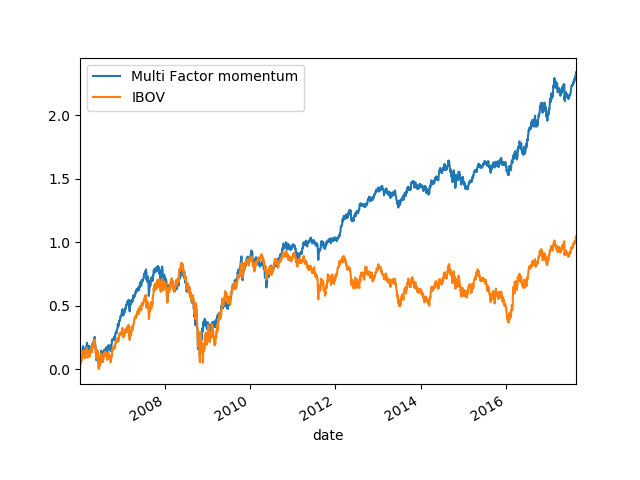

In [9]:
result.add_benchmark('../data/benchmark/IBOV.csv')
result.plot()

### MWU algorithm

In [3]:
start = time.time()
algorithm = Multiplicative_Weights(eta=0.3)
algorithm.rebalance_window=1
algorithm.rebalance_period='monthly'
result = algorithm.run(returns,start_date='01/01/2006')
end = time.time()
print('MWU Elapsed time: ', (end-start), ' segundos')

MWU Elapsed time:  1.5122230052947998  segundos


<IPython.core.display.Javascript object>


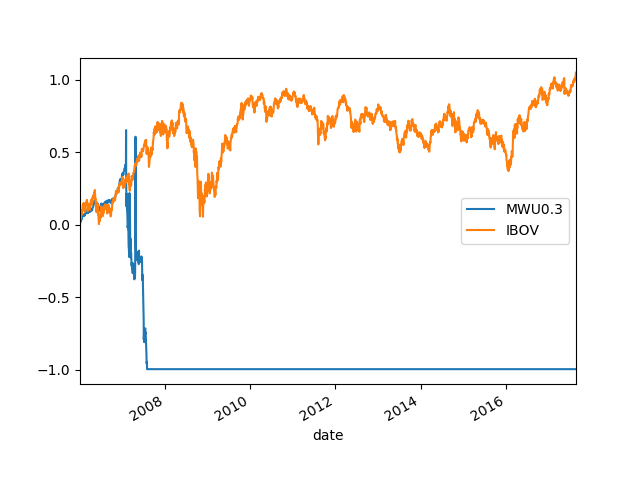

In [4]:
result.add_benchmark('../data/benchmark/IBOV.csv')
result.plot()